In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Activation function and helper functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

def compute_cost(y, y_pred):
    m = len(y)
    cost = -(1 / m) * np.sum(y * np.log(y_pred + 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
    return cost

def compute_gradients(X, y, y_pred):
    m = len(y)
    dw = (1 / m) * np.dot(X.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)
    return dw, db

In [3]:
# Logistic Regression Training
def train_logistic_regression(X, y, learning_rate=0.01, n_iterations=1000):
    n_features = X.shape[1]
    weights, bias = initialize_weights(n_features)
    cost_history = []

    for i in range(n_iterations):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        cost = compute_cost(y, y_pred)
        cost_history.append(cost)
        dw, db = compute_gradients(X, y, y_pred)
        weights -= learning_rate * dw
        bias -= learning_rate * db
    return weights, bias, cost_history

In [4]:
# Prediction Function
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return np.where(y_pred >= 0.5, 1, 0)

In [5]:
# Evaluation Function
def evaluate_model(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    return accuracy

In [6]:
# Create a synthetic dataset
np.random.seed(42)

data = {
    "Experience_Years": np.random.randint(0, 20, size=100),
    "Certifications": np.random.choice(["Yes", "No"], size=100),
    "Skill_Score": np.random.randint(30, 100, size=100),
    "Required_Skill_Score": np.random.randint(40, 100, size=100),
    "Skill_Gap": np.random.choice(["Gap", "No Gap"], size=100)
}

df = pd.DataFrame(data)

# Save the dataset as a CSV file
df.to_csv("Skill_Gap_Data.csv", index=False)

print("Synthetic dataset saved as 'Skill_Gap_Data.csv'")

Synthetic dataset saved as 'Skill_Gap_Data.csv'


In [7]:
# Load the data
data = pd.read_csv('Skill_Gap_Data.csv')

In [8]:
# Data Preprocessing
# Convert necessary columns to numeric or binary (example transformation)
data['Experience_Years'] = pd.to_numeric(data['Experience_Years'], errors='coerce')
data['Certifications'] = data['Certifications'].map({'Yes': 1, 'No': 0})
data['Skill_Score'] = pd.to_numeric(data['Skill_Score'], errors='coerce')
data['Required_Skill_Score'] = pd.to_numeric(data['Required_Skill_Score'], errors='coerce')


In [9]:
# Select features and target variable
X = data[['Experience_Years', 'Certifications', 'Skill_Score', 'Required_Skill_Score']]
y = data['Skill_Gap']  # Target variable (e.g., "Gap" or "No Gap")


In [10]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
# Drop rows with missing values
X.dropna(inplace=True)
y_encoded = y_encoded[X.index.isin(X.dropna().index)]

C:\Users\nithi\AppData\Local\Temp\ipykernel_12840\971075024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y_encoded, test_size=0.2, random_state=42)


In [13]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Train the model
weights, bias, cost_history = train_logistic_regression(X_train_scaled, y_train, learning_rate=0.01, n_iterations=1000)


In [15]:
# Make predictions
y_pred = predict(X_test_scaled, weights, bias)


In [16]:
# Evaluate the model
accuracy = evaluate_model(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 40.00%


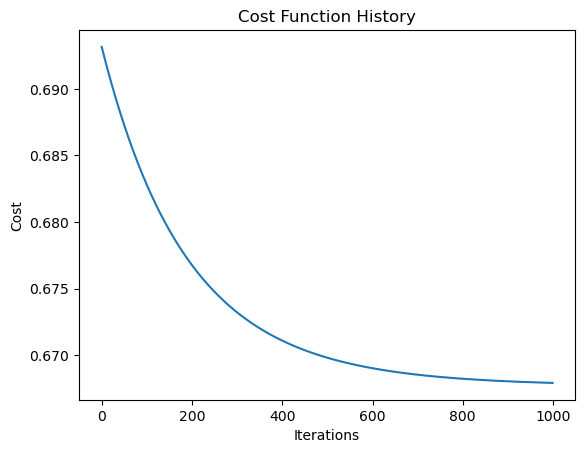

In [17]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.title("Cost Function History")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()